In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [4]:
df=pd.read_csv("count_matrix.csv")

In [5]:
df.head()

,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_E paired human Q10 aligned,SVA_E paired human Q20 aligned,SVA_F unpaired reads aligned,SVA_F unpaired human Q00 aligned,SVA_F unpaired human Q10 aligned,SVA_F unpaired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,4692,4581,12823,11788,4762,4719,8134,2632,2216,2170
1,02-2483-10A,579304076,4735,4646,2687,2673,3338,1474,1333,1308,...,4111,4016,10290,9529,3830,3791,6732,2296,1910,1878
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,4811,4690,11766,10748,4482,4433,8146,2701,2262,2217
3,02-2485-10A,478851061,3895,3849,2229,2221,2564,1162,1073,1061,...,4063,3959,8731,8061,3293,3252,6392,2246,1893,1860
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,11146,10953,24154,22406,9480,9421,17454,6553,5567,5507


In [6]:
tumor=df[df['subject'].str.contains("-01.$")].copy()

In [7]:
tumor.head()

,subject,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,HERVK113 unpaired human Q10 aligned,HERVK113 unpaired human Q20 aligned,HERVK113 paired reads aligned,HERVK113 paired human Q00 aligned,HERVK113 paired human Q10 aligned,HERVK113 paired human Q20 aligned,...,SVA_E paired human Q10 aligned,SVA_E paired human Q20 aligned,SVA_F unpaired reads aligned,SVA_F unpaired human Q00 aligned,SVA_F unpaired human Q10 aligned,SVA_F unpaired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q00 aligned,SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned
0,02-2483-01A,566024474,5217,5099,2910,2894,3558,1493,1345,1328,...,4692,4581,12823,11788,4762,4719,8134,2632,2216,2170
2,02-2485-01A,575060540,5140,5047,2904,2892,3782,1671,1547,1523,...,4811,4690,11766,10748,4482,4433,8146,2701,2262,2217
4,06-0125-01A,1066268796,8464,8384,4874,4853,5920,2720,2538,2514,...,11146,10953,24154,22406,9480,9421,17454,6553,5567,5507
8,06-0157-01A,551037711,5322,5247,3005,2996,3280,1465,1361,1338,...,5428,5311,12049,10994,4524,4476,9170,3202,2611,2576
10,06-0171-01A,1170585350,9069,8940,5227,5190,6420,2949,2719,2672,...,11902,11675,24960,23053,9536,9441,18872,6913,5768,5693


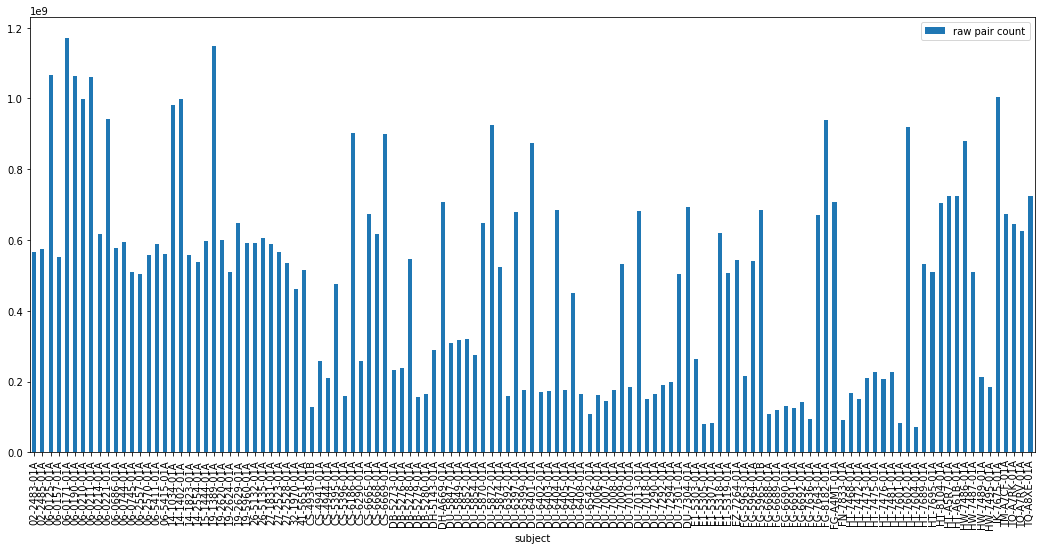

In [8]:
tumor.plot(x='subject',y='raw pair count',kind='bar')

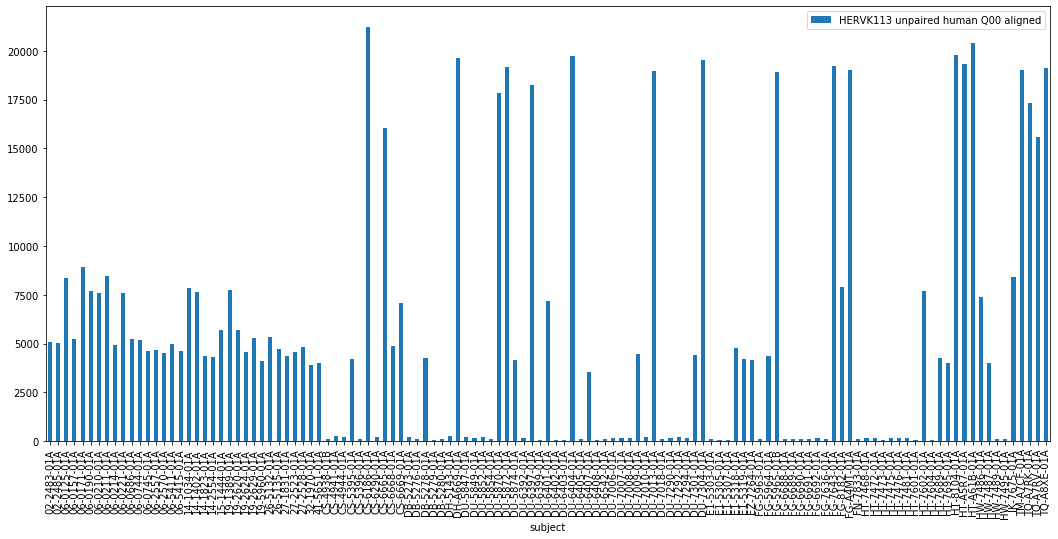

In [9]:
tumor.plot(x='subject',y='HERVK113 unpaired human Q00 aligned',kind='bar')

In [10]:
tumor['normalized HERVK113 unpaired human Q00 aligned']=tumor['HERVK113 unpaired human Q00 aligned']/tumor['raw pair count']

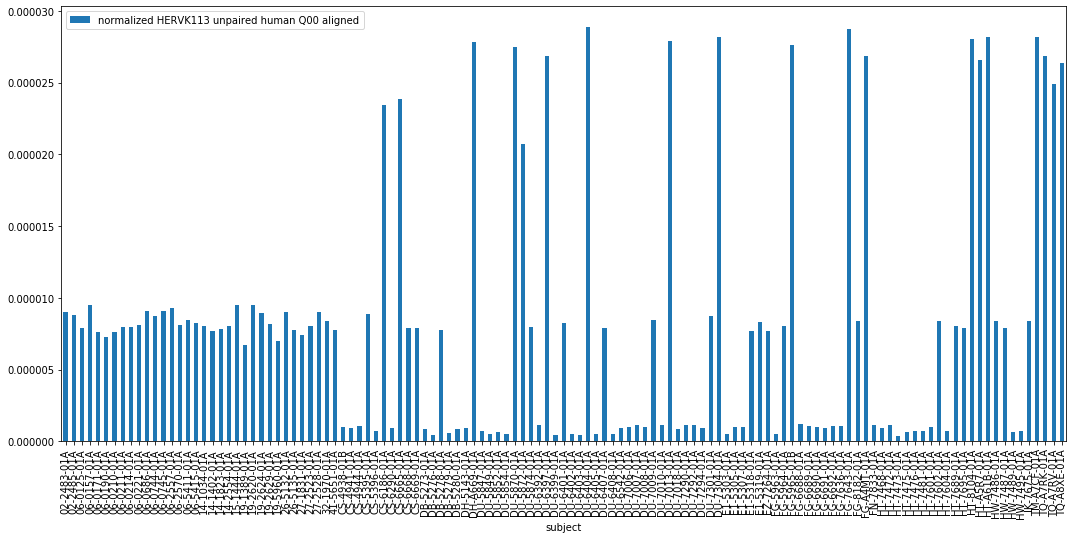

In [11]:
tumor.plot(x='subject',y='normalized HERVK113 unpaired human Q00 aligned',kind='bar')

In [12]:
tumor['normalized HERVK113 unpaired human Q20 aligned']=tumor['HERVK113 unpaired human Q20 aligned']/tumor['raw pair count']

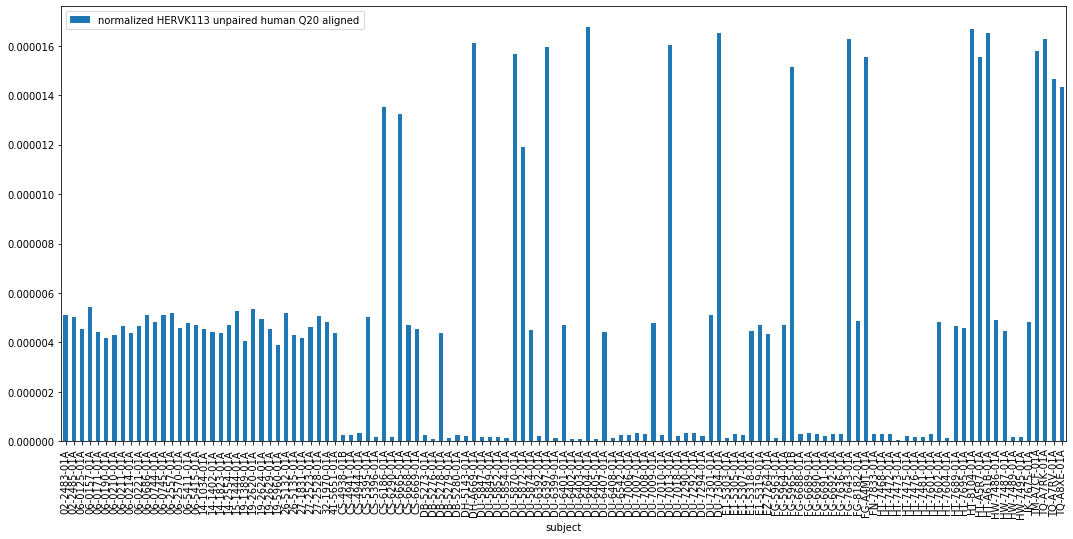

In [13]:
tumor.plot(x='subject',y='normalized HERVK113 unpaired human Q20 aligned',kind='bar')

In [14]:
normal=df[df['subject'].str.contains("-01.$")].copy()

In [15]:
normal['normalized HERVK113 unpaired human Q00 aligned']=normal['HERVK113 unpaired human Q00 aligned']/normal['raw pair count']

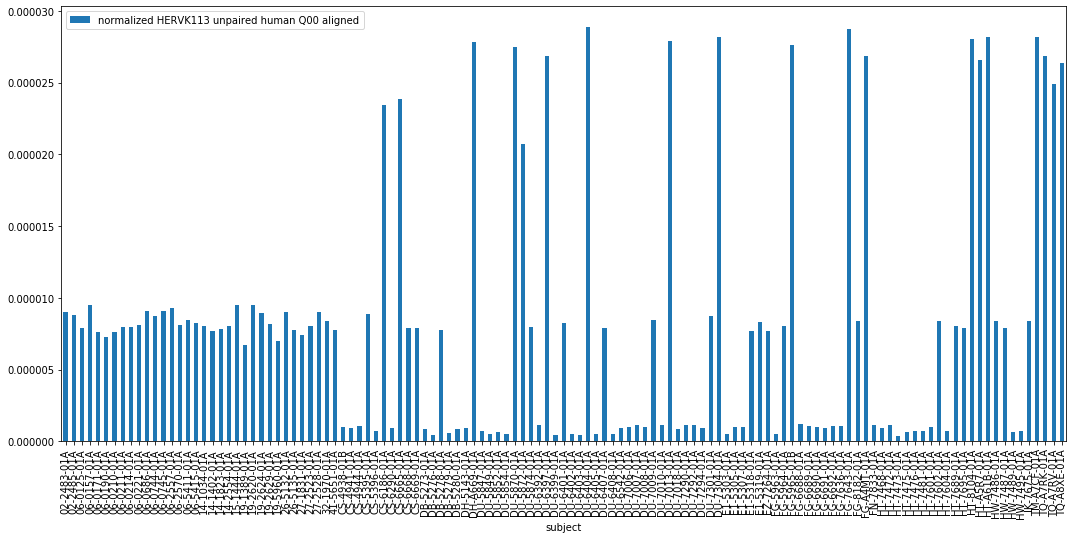

In [16]:
normal.plot(x='subject',y='normalized HERVK113 unpaired human Q00 aligned',kind='bar')

In [17]:
normal['normalized HERVK113 unpaired human Q20 aligned']=normal['HERVK113 unpaired human Q20 aligned']/normal['raw pair count']

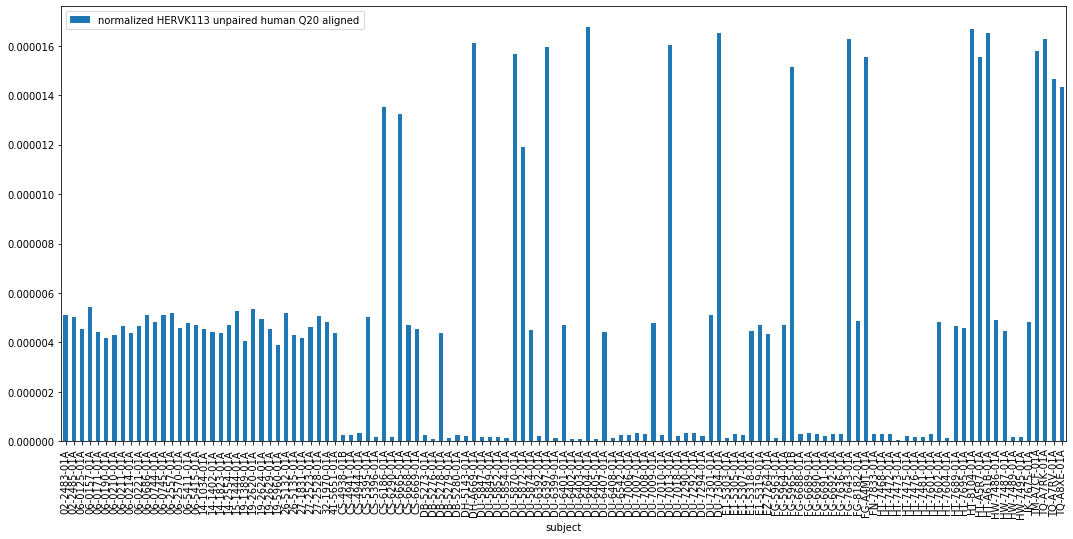

In [19]:
normal.plot(x='subject',y='normalized HERVK113 unpaired human Q20 aligned',kind='bar')